In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random

from krr import rkernel_training

%matplotlib inline

In [2]:
def exp_function(x):
    return np.exp(x)

In [3]:
x_data_uniform = np.linspace(-1, 2.8, 10)

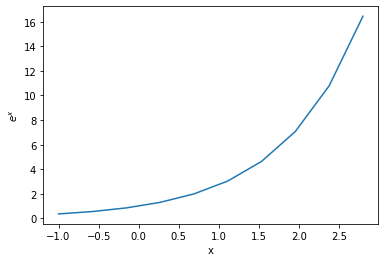

In [38]:
plt.plot(x_data_uniform, exp_function(x_data_uniform))
plt.xlabel('x')
plt.ylabel('$e^x$')
plt.savefig('exp.png', dpi=300)

In [5]:
def recursive_representation(x_train, y_train, x_d, y_d):
    return np.hstack((x_train, x_d)), np.hstack((y_train, y_d))

In [46]:
def recursive_training(initial_xdata, iterations=9):
    x_data = initial_xdata
    y_data = exp_function(x_data)
    lr_curve = []
    data_size = []
    for i in range(iterations):
        y_pred, y_train_dp, new_train_data = rkernel_training(x_train=x_data, 
                                                        y_train=y_data, 
                                                        x_test=test_data, 
                                                        y_test=exp_function(test_data),
                                                        train_sigma=None, 
                                                        train_lambda=1e-5,
                                                        rndm=np.random.uniform(-2, 3.5, y_data.shape))
        lr_curve.append(np.abs(y_pred-exp_function(test_data)))
        data_size.append(y_data.shape)
        x_data, y_data = recursive_representation(x_data, y_data, new_train_data, y_train_dp)
        print(f'Datasize {y_data.shape}')
    return x_data, y_data, y_pred, lr_curve, data_size

def min_training(new_train_data):
    x_data = x_data_uniform
    y_data = exp_function(x_data)
    y_pred, y_train_dp, _ = rkernel_training(x_train=x_data, 
                                                    y_train=y_data, 
                                                    x_test=test_data, 
                                                    y_test=exp_function(test_data),
                                                    train_sigma=None, 
                                                    train_lambda=1e-5,
                                                    rndm=np.random.uniform(-2, 3.5, y_data.shape))
    x_data, y_data = recursive_representation(x_data, y_data, new_train_data, y_train_dp)
    print(f'Datasize {y_data.shape}')
    return np.abs(y_pred-exp_function(test_data))

In [27]:
test_data = np.array([3,])

In [11]:
minimize(min_training, x0=x_data_uniform-random.uniform(0, 0.5))

Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)


      fun: array([4.23043968])
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-1.43333939, -1.01111717, -0.58889495, -0.16667273,  0.2555495 ,
        0.67777172,  1.09999394,  1.52221616,  1.94443839,  2.36666061])

In [47]:
x,y, pred, lr_curve, data_size = recursive_training(x_data_uniform)

Train MAE: 1.991740106177531e-14
Test MAE: 4.230439676497255
Datasize (20,)
Train MAE: 7.610578833805448e-14
Test MAE: 4.150197002936057
Datasize (40,)
Train MAE: 3.0618674262683497e-12
Test MAE: 4.149456329233146
Datasize (80,)
Train MAE: 1.939068627887508e-11
Test MAE: 4.149374710266905
Datasize (160,)
Train MAE: 7.785273814508997e-12
Test MAE: 4.14937471025997
Datasize (320,)
Train MAE: 2.5929533450930186e-10
Test MAE: 4.149374710606775
Datasize (640,)
Train MAE: 2.6063026424549827e-10
Test MAE: 4.149374680973228
Datasize (1280,)
Train MAE: 1.9628026244264407e-09
Test MAE: 4.149374681220454
Datasize (2560,)
Train MAE: 2.9997366691320024e-10
Test MAE: 4.1493746798636835
Datasize (5120,)


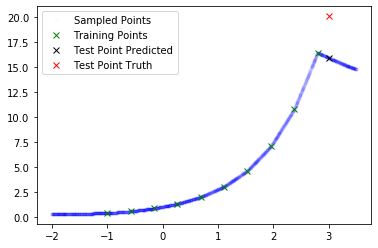

In [48]:
plt.plot(x,y, 'b.', alpha=0.01, label='Sampled Points')
plt.plot(x_data_uniform, exp_function(x_data_uniform), 'gx', label='Training Points')
plt.plot(test_data, pred, 'kx', label='Test Point Predicted')
plt.plot(test_data, exp_function(test_data), 'rx',label ='Test Point Truth')
plt.legend()
plt.savefig('exp_-1_35.png', dpi=300)

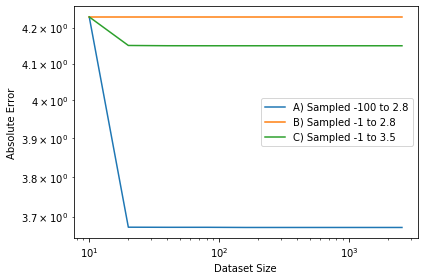

In [51]:
plt.plot(ds100, lrc100, label='A) Sampled -100 to 2.8')
plt.plot(ds1, lrc1, label='B) Sampled -1 to 2.8')
plt.plot(data_size, lr_curve, label='C) Sampled -1 to 3.5')
plt.loglog()
plt.xlabel('Dataset Size')
plt.ylabel('Absolute Error')
plt.legend()
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=300)

In [21]:
lrc100, ds100 = lr_curve, data_size

In [43]:
lrc1, ds1 = lr_curve, data_size